# **윤슬의 잔물결✨**

[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 1: 데이터 불러오기](https://dacon.io/competitions/official/236047/codeshare/7455?page=1&dtype=random)
</br>[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 2: 데이터 전처리 및 모델링](https://dacon.io/codeshare/7655)
</br>[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 3: 시각화 및 모델링](https://dacon.io/competitions/official/236047/codeshare/7656)
</br>[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 4: 고급 시각화 및 스케일링](https://dacon.io/competitions/official/236047/codeshare/7657?page=1&dtype=random)


분석을 시작하기에 앞서 사용했던 라이브러리와 데이터를 불러오겠습니다😊

> 라이브러리 호출

In [1]:
pip install geopandas  ## geopandas 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 3.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 고급 시각화
import geopandas as gpd
import pyproj
from fiona.crs import from_epsg

# 스케일링
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

> 데이터 불러오기

In [5]:
train = pd.read_csv('train.csv' ,index_col=0)
test = pd.read_csv('test.csv', index_col=0)
bus = pd.read_csv('bus_bts.csv' ,index_col=0)
submission = pd.read_csv('submission_sample.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> 전처리

In [6]:
#train 카피
train1=train.copy()

# train 데이터셋 전처리
train = train.replace('시내', 0)
train = train.replace('시외', 1)

train = train.drop(['station_name'], axis = 1)

train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].dt.weekday

train['6~8_ride']=train['6~7_ride']+train['7~8_ride'] # 6 ~ 8시 승차인원
train['8~10_ride']=train['8~9_ride']+train['9~10_ride']
train['10~12_ride']=train['10~11_ride']+train['11~12_ride']

train['6~8_off']=train['6~7_takeoff']+train['7~8_takeoff'] # 6 ~ 8시 하차인원
train['8~10_off']=train['8~9_takeoff']+train['9~10_takeoff']
train['10~12_off']=train['10~11_takeoff']+train['11~12_takeoff']

train=train.drop(['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride',
              '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'],axis=1)

In [7]:
#test 카피
test1=test.copy()

# test 데이터셋 전처리
test = test.replace('시외', 1)
test = test.replace('시내', 0)

test = test.drop(['station_name'], axis=1)

test['date'] = pd.to_datetime(test['date'])
test['date'] = test['date'].dt.weekday

test['6~8_ride']=test['6~7_ride']+test['7~8_ride'] # 6 ~ 8시 승차인원
test['8~10_ride']=test['8~9_ride']+test['9~10_ride']
test['10~12_ride']=test['10~11_ride']+test['11~12_ride']

test['6~8_off']=test['6~7_takeoff']+test['7~8_takeoff'] # 6 ~ 8시 하차인원
test['8~10_off']=test['8~9_takeoff']+test['9~10_takeoff']
test['10~12_off']=test['10~11_takeoff']+test['11~12_takeoff']


test=test.drop(['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride',
              '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'],axis=1)

In [8]:
x = train[['date', 'bus_route_id', 'in_out', 'station_code', 'latitude', 'longitude',
       "6~8_ride",  "8~10_ride", "10~12_ride" , 
       "6~8_off", "8~10_off",  "10~12_off"]]

y = train['18~20_ride']

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y)

이렇게 데이터를 불러왔으니, Stage4에서 사용했던 코드를 복습📌해보도록 하겠습니다

Geopandas, Pyproj, From_epsg 패키지를 불러와, <br/>우리 데이터의 정류장 위치 정보를 바탕으로 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">시각화</font>를 해보았습니다.

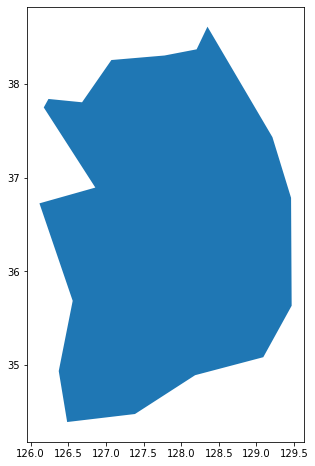

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
southkorea = world[world.name=='South Korea']
southkorea.plot(figsize=(10,8))

제주도를 나타내기 전, geopandas의 오픈데이터를 이용해 여러시각화를 해보았습니다.🌎

In [13]:
jeju_bus = gpd.points_from_xy(train.longitude, train.latitude)
jeju_bus[0:3]

<GeometryArray>
[<POINT (126.494 33.49)>, <POINT (126.485 33.489)>, <POINT (126.474 33.482)>]
Length: 3, dtype: geometry

In [14]:
coulumns = ['18~20_ride', 'station_code','in_out']
jeju_bus = gpd.GeoDataFrame(train[coulumns], geometry=jeju_bus, crs=from_epsg(4326))
#df_cctv_gdf.info()
jeju_bus.head()

,18~20_ride,station_code,in_out,geometry
id,,,,
0,0.0,344,1,POINT (126.49373 33.48990)
1,5.0,357,1,POINT (126.48508 33.48944)
2,2.0,432,1,POINT (126.47352 33.48181)
3,53.0,1579,0,POINT (126.49252 33.50577)
4,0.0,1646,0,POINT (126.41260 33.25579)


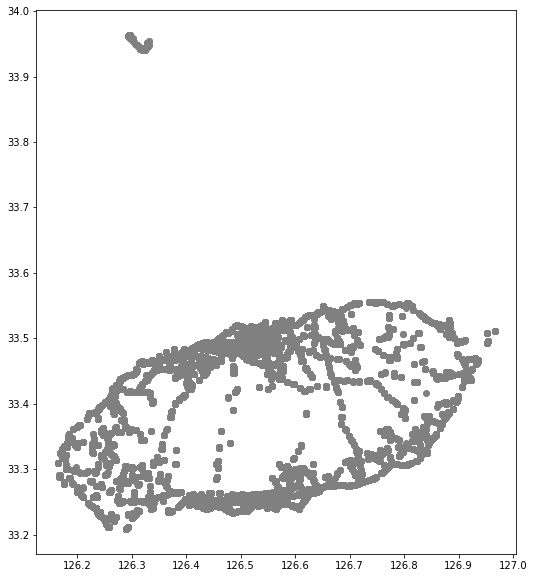

In [15]:
jeju_bus2 = jeju_bus.to_crs(epsg=4326)
jeju_bus2.plot(color='gray', figsize=(10,10))

버스 정류장 코드를 통해 제주도내 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">정류장 위치</font>를 회색 포인트로 표현해봤습니다🚌

/usr/local/lib/python3.8/dist-packages/geopandas/array.py:938: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:939: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:940: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:941: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:410: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


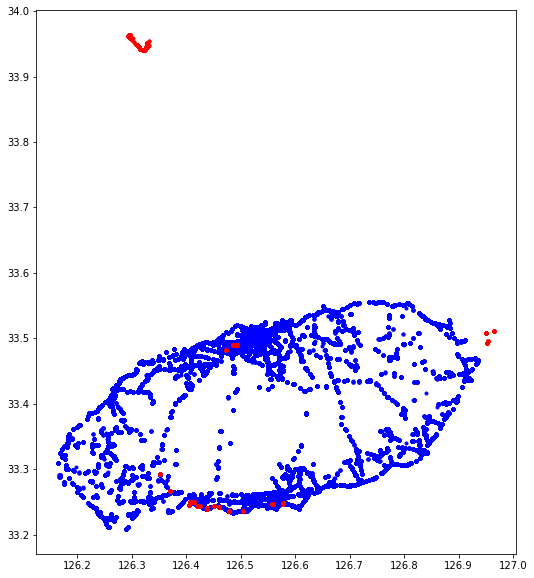

In [16]:
ax=jeju_bus.boundary.plot(linewidth=1,color='black',figsize=(10,10))
jeju_bus[jeju_bus['in_out']==0].plot(ax=ax, color='blue',markersize=9) #시내
jeju_bus[jeju_bus['in_out']==1].plot(ax=ax, color='red',markersize=9) #시외
plt.show()

그리고 푸른색과 붉은색 포인트로 시내버스와 시외버스를 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">구분</font>했습니다.

Stage5에서는 이 시각화 자료를 활용해 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">전처리</font> 를 해볼 예정입니다.

시각화 단계를 지나, 데이터 스케일링을 해보았습니다.
<br/>이때, Sklearn에서 제공하는 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">MinMaxScaler</font>을 사용했습니다.

<br/>우리가 스케일링 할 컬럼만 추려서 정규화를 진행했습니다.

> train 데이터

In [17]:
transformer = MinMaxScaler()
train11 = transformer.fit_transform(train[["date","bus_route_id", "in_out", "station_code",
                                            "6~8_ride", "8~10_ride" ,"10~12_ride", "6~8_off",  "8~10_off", "10~12_off"]])
train[["date","bus_route_id", "in_out", "station_code", 
       "6~8_ride", "8~10_ride" ,"10~12_ride", "6~8_off",  "8~10_off", "10~12_off"]] = train11

> test 데이터

In [18]:
transformer = MinMaxScaler()
test11 = transformer.fit_transform(test[["date","bus_route_id", "in_out", "station_code", 
                                          "6~8_ride", "8~10_ride" ,"10~12_ride",  "6~8_off",  "8~10_off", "10~12_off"]])
test[["date","bus_route_id", "in_out", "station_code", 
      "6~8_ride", "8~10_ride" ,"10~12_ride",  "6~8_off",  "8~10_off", "10~12_off"]] = test11

# **1. 개념 알아가기**

> **공공 데이터 사용**

데이터 분석을 하다보면, 필요에 따라 외부 데이터를 가져올 수 있습니다. 
<br/>주로 누구나 쉽게 접근하고 활용할 수 있는 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">"공공데이터"</font>를 사용합니다. 
<br/>또는 누군가 만들어 놓은 데이터를 사용하기도 합니다.

<br/>공공데이터는 정부와 공기업 등 공공 기관이 관리하고 있는 데이터입니다. <br/>공공기관이 보유하고 있는 데이터는 그 양이 매우 방대하여 빅데이터 조건을 갖추고 있습니다. <br/>따라서, 그 질과 양적 측면에서 광범위한 것이 특징입니다.

<br/>**🔍데이터를 제공하는 공공기관 포털 예시**
<br/>[공공데이터 포털] https://www.data.go.kr/
<br/>[한국도로공사] http://data.ex.co.kr/
<br/>[기상청] https://data.kma.go.kr/cmmn/main.do
<br/>[국토교통부] http://data.nsdi.go.kr/dataset/15145

<br/>위 예시들 외에도 다양한 사이트가 있으므로, <br/>필요에 따라 사이트를 찾아 데이터를 다운받으면 됩니다💛


> **직접 데이터 수집**

또한, 웹 사이트에서 직접 데이터를 수집할 수 있습니다.
<br/> 바로, <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">"웹 크롤링(Crawling)"</font>입니다.

<br/>웹 크롤링이란 웹 상에 존재하는 컨텐츠를 수집하는 작업으로, <br/>웹 사이트 속의 필요한 정보를 빠른 시간에 수집하는 작업입니다.

<br/>크롤링을 하기 위해서 <font style="color:#FF9999; font-weight : bold; font-size : 25px;">"BeautifulSoup"</font> 라이브러리를 사용해야 합니다.
<br/>BeautifulSoup 은 HTML의 태그를 파싱해서 필요한 데이터만 추출하는 함수를 제공하는 라이브러리입니다.
<br/><font color='grey'>- HTML(Hypertext Markup Language): 가장 단순한 형태의 웹 언어</font>

Stage5에서 이전 고급 시각화 코드를 이어가는 것과 더불어 외부 데이터를 활용해볼려고 합니다.
<br/>저희는 외부데이터로 공공데이터를 다운받아 사용할 예정입니다.
<br/>그리고 새로운✨ 모델을 사용해 볼 예정입니다.
<br/>모두 준비됐나요?

<br/>그렇다면, 출발🌊

#**2. 전처리2**

스테이지 2에서 했던 전처리를 기억하시나요?
<br/>이번 스테이지에선 추가 전처리를 진행하려고 합니다.

1️⃣ 섬에만 다니는 버스노선 구분  
2️⃣ 날짜 데이터를 이용해 평일과 주말을 구분  
3️⃣ 공휴일 정보를 입력해 공휴일 구분  



### **(1) 지도 응용**

지도 시각화를 그렸을때, 우리가 알고있는 제주도 밖에 있는 섬 모양 그림을 관찰 할 수 있습니다.


<img src="https://ifh.cc/g/hLaKA9.png" width="750" height=""/> 


위의 그림을 살펴보면 <font style="color:#FF9999; font-weight : bold; font-size : 25px;">빨간색 점(시외)</font>이 모여 있는 곳은 </br><font style="font-weight : bold">추자도</font>와 <font style="font-weight : bold">우도</font>인 것을 확인할 수 있습니다.

<br/>여기에 있는 버스 정류장의 위도, 경도를 조사해 <br/>제주도에 있는 정류장과 주변 섬에 있는 정류장을 구별해 보도록 하겠습니다.
<br/>

**섬과 위도, 경도**
- 추자도 : 33.95175, 126.31156
- 우도 : 33.50367, 126.95577







train의 시외 정보만 담고있는 행들을 모아 새로운 데이터 프레임 'q'를 만들어 주겠습니다.

In [19]:
q=train[train["in_out"]==1]

<font style="font-weight : bold">추자도</font>는 제주도보다 <font style="font-weight : bold">위도가 높은 곳</font>에 위치하고 있으니 <font style="font-weight : bold">33.9xx</font> 값을 가지는 행들을 확인해볼까요?

In [20]:
q[q['latitude']>33.9]

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off
id,,,,,,,,,,,,,
81,1.0,0.551313,1.0,0.999983,33.96269,126.29761,0.0,0.017544,0.016575,0.034483,0.0,0.0,0.0
82,1.0,0.551313,1.0,0.999984,33.96364,126.29681,0.0,0.000000,0.000000,0.005747,0.0,0.0,0.0
83,1.0,0.551313,1.0,0.999984,33.96284,126.29564,0.0,0.000000,0.027624,0.000000,0.0,0.0,0.0
84,1.0,0.551313,1.0,0.999984,33.96232,126.29416,0.0,0.000000,0.000000,0.005747,0.0,0.0,0.0
85,1.0,0.551313,1.0,0.999984,33.96141,126.29452,0.0,0.000000,0.011050,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399639,0.0,0.551313,1.0,0.999988,33.94379,126.32571,0.0,0.000000,0.049724,0.000000,0.0,0.0,0.0
399640,0.0,0.551313,1.0,0.999989,33.94093,126.32142,0.0,0.000000,0.005525,0.000000,0.0,0.0,0.0
399641,0.0,0.551313,1.0,0.999989,33.94468,126.31297,0.0,0.000000,0.005525,0.000000,0.0,0.0,0.0


375개의 데이터가 추자도에서 발생한 것이 확인되었습니다. <br/>이 값들을 저장하기 위해 새로운 열 'island_1'를 만들어줍니다.

값은 모두 0으로 채워줍니다.

In [21]:
train['island_1']=0

값이 33.9 이상이면 1을 return하고, 그 외에는 0을 return하는 함수를 만들어보겠습니다.

In [22]:
def etc_island(row):
    if row > 33.9:
        return 1
    else:
        return 0
      

이를 train에 적용해 island에 값을 추가합니다.
<br/>지금은 train의 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">latitude</font>열에 적용하면 되겠죠?

In [23]:
train.island_1 = train.latitude.apply(etc_island) 

제대로 담겼는지 확인해볼까요?


In [24]:
train[train["latitude"]>33.89]

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off,island_1
id,,,,,,,,,,,,,,
81,1.0,0.551313,1.0,0.999983,33.96269,126.29761,0.0,0.017544,0.016575,0.034483,0.0,0.0,0.0,1
82,1.0,0.551313,1.0,0.999984,33.96364,126.29681,0.0,0.000000,0.000000,0.005747,0.0,0.0,0.0,1
83,1.0,0.551313,1.0,0.999984,33.96284,126.29564,0.0,0.000000,0.027624,0.000000,0.0,0.0,0.0,1
84,1.0,0.551313,1.0,0.999984,33.96232,126.29416,0.0,0.000000,0.000000,0.005747,0.0,0.0,0.0,1
85,1.0,0.551313,1.0,0.999984,33.96141,126.29452,0.0,0.000000,0.011050,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399639,0.0,0.551313,1.0,0.999988,33.94379,126.32571,0.0,0.000000,0.049724,0.000000,0.0,0.0,0.0,1
399640,0.0,0.551313,1.0,0.999989,33.94093,126.32142,0.0,0.000000,0.005525,0.000000,0.0,0.0,0.0,1
399641,0.0,0.551313,1.0,0.999989,33.94468,126.31297,0.0,0.000000,0.005525,0.000000,0.0,0.0,0.0,1


island 열에 1이 들어가 있는 것을 확인할 수 있죠?

그렇다면 이어서 우도도 island열에 1로 저장해 보겠습니다.


<font style="font-weight : bold">우도</font>는 제주도보다 <font style="font-weight : bold">오른쪽</font>에 위치해 있습니다.

![img](https://ifh.cc/g/zYWWtC.png)

그 사이의 경도 차이는 대략 126.91에서 126.94로 정말 미세한 차이 입니다.

같은 방법으로 우도를 island_2에 2로 표시해 주겠습니다. <br/>island_2 열을 만들어 주고 0으로 채워봅니다.

In [25]:
train['island_2']=0

경도 값은 longitude 열에 담겨 있습니다. <br/>값이 126.94 이상이면 2을 return하고, 그 외에는 0을 return하는 함수를 만들어보겠습니다.



In [26]:
def etc_island2(row):
    if row > 126.94:

        return 2
    else :
        return 0
      

이를 train에 적용해 island_2에 값을 추가합니다.
<br/>지금은 train의 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">longitude</font>열에 적용하면 되겠죠?

In [27]:
train.island_2 = train.longitude.apply(etc_island2) 

제대로 담겼는지 확인해볼까요?


In [28]:
train[train["longitude"]>126.93]

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off,island_1,island_2
id,,,,,,,,,,,,,,,
91,1.0,0.552364,1.0,0.999991,33.49334,126.95151,0.0,0.000000,0.022099,0.011494,0.000000,0.000000,0.000000,0,2
92,1.0,0.552715,1.0,0.999992,33.51123,126.96567,0.0,0.008772,0.011050,0.011494,0.000000,0.000000,0.000000,0,2
228,1.0,0.592294,0.0,0.000363,33.47032,126.93008,0.0,0.000000,0.000000,0.000000,0.000000,0.127907,0.083333,0,0
230,1.0,0.592294,0.0,0.000384,33.46271,126.93303,0.0,0.000000,0.000000,0.000000,0.000000,0.058140,0.037037,0,0
235,1.0,0.592995,0.0,0.000363,33.47032,126.93008,0.0,0.000000,0.000000,0.000000,0.023529,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412688,0.0,0.947811,0.0,0.000384,33.46376,126.93377,0.0,0.000000,0.055249,0.000000,0.000000,0.000000,0.000000,0,0
412716,0.0,0.948161,0.0,0.000363,33.47032,126.93008,0.0,0.000000,0.000000,0.000000,0.023529,0.000000,0.000000,0,0
412718,0.0,0.948161,0.0,0.000383,33.46067,126.93132,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.009259,0,0


island_1 과 island_2를 합쳐 island 열을 만들어 보겠습니다.

In [29]:
train['island']=train["island_1"]+train["island_2"] #지금은 1,2 값이 서로 겹치지 않아 +를 사용함.

In [30]:
train[train["longitude"]>126.93].head()

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off,island_1,island_2,island
id,,,,,,,,,,,,,,,,
91,1.0,0.552364,1.0,0.999991,33.49334,126.95151,0.0,0.000000,0.022099,0.011494,0.000000,0.000000,0.000000,0,2,2
92,1.0,0.552715,1.0,0.999992,33.51123,126.96567,0.0,0.008772,0.011050,0.011494,0.000000,0.000000,0.000000,0,2,2
228,1.0,0.592294,0.0,0.000363,33.47032,126.93008,0.0,0.000000,0.000000,0.000000,0.000000,0.127907,0.083333,0,0,0
230,1.0,0.592294,0.0,0.000384,33.46271,126.93303,0.0,0.000000,0.000000,0.000000,0.000000,0.058140,0.037037,0,0,0
235,1.0,0.592995,0.0,0.000363,33.47032,126.93008,0.0,0.000000,0.000000,0.000000,0.023529,0.000000,0.000000,0,0,0


In [31]:
train[train["latitude"]>33.89].head()

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off,island_1,island_2,island
id,,,,,,,,,,,,,,,,
81,1.0,0.551313,1.0,0.999983,33.96269,126.29761,0.0,0.017544,0.016575,0.034483,0.0,0.0,0.0,1,0,1
82,1.0,0.551313,1.0,0.999984,33.96364,126.29681,0.0,0.000000,0.000000,0.005747,0.0,0.0,0.0,1,0,1
83,1.0,0.551313,1.0,0.999984,33.96284,126.29564,0.0,0.000000,0.027624,0.000000,0.0,0.0,0.0,1,0,1
84,1.0,0.551313,1.0,0.999984,33.96232,126.29416,0.0,0.000000,0.000000,0.005747,0.0,0.0,0.0,1,0,1
85,1.0,0.551313,1.0,0.999984,33.96141,126.29452,0.0,0.000000,0.011050,0.000000,0.0,0.0,0.0,1,0,1


잘 합쳐진 것을 확인해봤습니다.! 이제 island_1과 island_2는 지워줄게요!

In [32]:
train=train.drop(['island_1','island_2'],axis=1)

추자도, 우도를 구분했던 방법으로 test 데이터에도 적용해볼게요!

### **🔑참여 실습**


### *Inst.*  
test 데이터를 추자도, 우도로 구분해봅시다.






### *Hint.*  
fillna(), apply(), drop() 




### *Solution.*


In [33]:
test['island_1']=0
test.island_1 = test.latitude.apply(etc_island) 

test['island_2']=0
test.island_2 = test.longitude.apply(etc_island2)

test['island']=test["island_1"]+test["island_2"]
test=test.drop(['island_1','island_2'],axis=1)

### **2. 날짜변환 응용**


date 열을 지우기 전에 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">copy</font>해서 train1 이라는 새로운 데이터 프레임을 만들어 뒀습니다.!

이것을 이용해 <font style="font-weight : bold">공휴일과, 평일, 주말</font>을 구분해 보겠습니다.

우선 2019년에 어떤 날짜가 공휴일인지 알아야겠죠?  

train은 9월, test는 10월로 2019년 9월과 10월에 해당하는 공휴일을 holidays에 저장합니다.

In [34]:
holidays = ['2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09']

지난 스테이지에서 했던 것처럼 데이터를 datetime으로 변환해 요일로 변경해 주겠습니다.

In [35]:
train1['weekday'] = pd.to_datetime(train1['date'])
train1['weekday'] = train1['weekday'].dt.weekday

그리고 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">lambda</font>를 이용해 평일과 주말을 알려주는 holiday 열과 <br/>공휴일인지 주말인지를 알려주는 holiweekend 열을 만들어 보겠습니다.

lambda는 함수를 딱 한 줄만으로 만들게 해줘서 편리합니다. <br/>사용할 때는 아래와 같이 써주면 됩니다.
<br/>

▶lambda 매개변수 : 표현식


<br/>
<font style="font-weight : bold">lambda</font>는 보통 <font style="font-weight : bold">apply</font>와 같이 쓰입니다.

10은 공휴일, 20은 주말을 의미합니다.

In [36]:
train1['holiday'] = train1.apply(lambda row: 1 if row.date in holidays else 0, axis=1)
train1['holiweekend'] = train1.apply(lambda row: 10 if row.holiday == 1 else 0, axis=1)
train1['holiweekend'] = train1.apply(lambda row: 20 if row.holiweekend ==0 and row.weekday in [5,6] else row.holiweekend, axis=1)

그럼 잘 변환 되었는지 확인해보겠습니다.

In [37]:
train1.head(178000)

,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,...,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday,holiday,holiweekend
id,,,,,,,,,,,,,,,,,,,,,
0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0,20
1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6,0,20
2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6,0,20
3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6,0,20
4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177995,2019-09-14,23010000,시내,292,천수동,33.50934,126.54257,0.0,1.0,2.0,...,1.0,1.0,4.0,5.0,4.0,0.0,4.0,5,1,10
177996,2019-09-14,23010000,시내,293,국립제주박물관,33.51248,126.54997,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,10
177997,2019-09-14,23010000,시내,318,연동주민센터,33.48815,126.49636,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,5,1,10


여기서 holiday 열과 holiweekend 열을 train에 추가시켜 주겠습니다.

In [38]:
train['holiday']=train1['holiday']
train['holiweekend']=train1['holiweekend']

그럼 test데이터로 실습을 해봅시다.

### **🔑참여 실습**


### *Inst.*  
test 데이터로 공휴일과 평일, 주말을 구분해봅시다.





### *Hint.*  
pd.to_datetime(), apply()




### *Solution.*


In [39]:
test1['weekday'] = pd.to_datetime(test1['date'])
test1['weekday'] = test1['weekday'].dt.weekday

test1['holiday'] = test1.apply(lambda row: 1 if row.date in holidays else 0, axis=1)
test1['holiweekend'] = test1.apply(lambda row: 10 if row.holiday == 1 else 0, axis=1)
test1['holiweekend'] = test1.apply(lambda row: 20 if row.holiweekend ==0 and row.weekday in [5,6] else row.holiweekend, axis=1)

test['holiday']=test1['holiday']
test['holiweekend']=test1['holiweekend']

# **3. 외부 데이터 활용**

외부 데이터는 기상청 기상자료개방포털에서 가져왔습니다. 

https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36 에 들어가서 </br>제주도의 제주시와 서귀포시의 평균기온, 일강수량, 최대 순간 풍속, 최소 상대습도를 선택해서 데이터를 다운받아 봅시다. 

인코딩 에러가 나지 않도록 encoding='cp949'를 같이 작성해줍니다.

In [41]:
weather = pd.read_csv('제주도 기상관측자료.csv', encoding='cp949')

전처리하지 않은 train데이터의 date가 필요하므로 다시 train 데이터를 다른 이름으로 불러와줍니다.

In [43]:
True_train = pd.read_csv('train.csv' ,index_col=0)

In [44]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             92 non-null     int64  
 1   지점명            92 non-null     object 
 2   일시             92 non-null     object 
 3   평균기온(°C)       92 non-null     float64
 4   일강수량(mm)       52 non-null     float64
 5   최대 순간 풍속(m/s)  92 non-null     float64
 6   최소 상대습도(%)     92 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 5.2+ KB


weather의 출력값을 보면 nan값이 존재합니다. 

stage1에서 배웠던 대로 결측치를 0으로 채워봅시다.

In [45]:
weather = weather.fillna(0)

weather 데이터를 <font style="font-weight : bold">제주시</font>와 <font style="font-weight : bold">서귀포시</font>로 나눠서 살펴볼 수 있습니다.

In [46]:
weather.loc[weather.지점명 == '제주'].head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),최대 순간 풍속(m/s),최소 상대습도(%)
0,184,제주,2019-09-01,23.3,26.1,7.6,58
1,184,제주,2019-09-02,24.1,25.7,11.1,80
2,184,제주,2019-09-03,24.8,13.9,11.1,83
3,184,제주,2019-09-04,24.7,43.0,7.4,76
4,184,제주,2019-09-05,26.2,7.0,7.6,71


In [47]:
weather.loc[weather.지점명 == '서귀포'].head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),최대 순간 풍속(m/s),최소 상대습도(%)
46,189,서귀포,2019-09-01,22.6,18.7,5.3,77
47,189,서귀포,2019-09-02,25.0,14.6,7.2,99
48,189,서귀포,2019-09-03,25.5,9.5,5.2,97
49,189,서귀포,2019-09-04,25.0,28.9,4.9,85
50,189,서귀포,2019-09-05,26.4,15.7,4.4,99


전처리 진행하지 않은 train데이터인 true_train에서 date값을 가져옵시다. 

전처리를 진행한 train 데이터의 date와 헷갈릴 수 있으므로 date_YMD로 열의 이름을 변경합시다. 

In [48]:
True_train['date']
True_train= True_train.rename(columns={'date':'date_YMD'})

이제 train 데이터에 date_YMD의 열을 합쳐봅시다. 

<font style="color:#99CCFF; font-weight : bold; font-size : 25px;">concat</font>은 연결의 뜻을 가진 concatenation의 줄임말로 데이터프레임끼리 합칠 수 있는 함수입니다. 

함수의 디폴트 값은 <font style="font-weight : bold">axis = 0</font>으로 <font style="font-weight : bold">행</font>끼리 합치는 것이므로</br>
 <font style="font-weight : bold">열</font>끼리 합치기 위해서 <font style="font-weight : bold">axis = 1</font>을 함수 안에 넣어줍니다. 

**pd.concat( [데이터프레임, 데이터프레임])** 의 형식입니다.
 </br> 데이터 프레임 2개 이상을 한번에 합칠 수 있습니다. 

In [49]:
train = pd.concat([train, True_train['date_YMD']], axis=1)
train

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off,island,holiday,holiweekend,date_YMD
id,,,,,,,,,,,,,,,,,
0,1.0,0.0,1.0,0.000056,33.48990,126.49373,0.0,0.008772,0.038674,0.045977,0.000000,0.000000,0.0,0,0,20,2019-09-01
1,1.0,0.0,1.0,0.000058,33.48944,126.48508,5.0,0.043860,0.033149,0.063218,0.000000,0.000000,0.0,0,0,20,2019-09-01
2,1.0,0.0,1.0,0.000070,33.48181,126.47352,2.0,0.017544,0.011050,0.000000,0.000000,0.000000,0.0,0,0,20,2019-09-01
3,1.0,0.0,0.0,0.000258,33.50577,126.49252,53.0,0.149123,0.176796,0.172414,0.000000,0.000000,0.0,0,0,20,2019-09-01
4,1.0,0.0,0.0,0.000269,33.25579,126.41260,0.0,0.000000,0.000000,0.000000,0.000000,0.011628,0.0,0,0,20,2019-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,0.0,1.0,0.0,0.000184,33.41437,126.26336,0.0,0.035088,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,2019-09-30
415419,0.0,1.0,0.0,0.000256,33.49946,126.51479,0.0,0.035088,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,2019-09-30
415420,0.0,1.0,0.0,0.000380,33.23100,126.26273,0.0,0.000000,0.000000,0.000000,0.011765,0.000000,0.0,0,0,0,2019-09-30


<font style="font-weight : bold">서귀포</font>는 위도 33.1696799 에서 33.4693 사이, 경도 126.1901784 에서 126.9316578 사이에 위치합니다.

<font style="font-weight : bold">제주시</font>는 위도 33.301833 에서 34.00952, 경도 126.1798 에서 126.9549 사이에 위치합니다.

위도를 기준으로 위로는 제주시, 아래로는 서귀포시로 구분해봅시다. </br>
33.301833보다 아래에 위치하면 서귀포시로 취급합니다.

In [50]:
(train['latitude'] <=33.301833).sum() # 서귀포

108498

train에 ground라는 제주시와 서귀포시를 구분할 열을 만들어 봅시다.

In [51]:
train['ground'] = 0
train

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off,island,holiday,holiweekend,date_YMD,ground
id,,,,,,,,,,,,,,,,,,
0,1.0,0.0,1.0,0.000056,33.48990,126.49373,0.0,0.008772,0.038674,0.045977,0.000000,0.000000,0.0,0,0,20,2019-09-01,0
1,1.0,0.0,1.0,0.000058,33.48944,126.48508,5.0,0.043860,0.033149,0.063218,0.000000,0.000000,0.0,0,0,20,2019-09-01,0
2,1.0,0.0,1.0,0.000070,33.48181,126.47352,2.0,0.017544,0.011050,0.000000,0.000000,0.000000,0.0,0,0,20,2019-09-01,0
3,1.0,0.0,0.0,0.000258,33.50577,126.49252,53.0,0.149123,0.176796,0.172414,0.000000,0.000000,0.0,0,0,20,2019-09-01,0
4,1.0,0.0,0.0,0.000269,33.25579,126.41260,0.0,0.000000,0.000000,0.000000,0.000000,0.011628,0.0,0,0,20,2019-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,0.0,1.0,0.0,0.000184,33.41437,126.26336,0.0,0.035088,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,2019-09-30,0
415419,0.0,1.0,0.0,0.000256,33.49946,126.51479,0.0,0.035088,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,2019-09-30,0
415420,0.0,1.0,0.0,0.000380,33.23100,126.26273,0.0,0.000000,0.000000,0.000000,0.011765,0.000000,0.0,0,0,0,2019-09-30,0


위도 33.301833 아래이면 ground에 1이 들어가도록 해봅시다.
</br> 즉 <font style="font-weight : bold">서귀포시</font>는 1, <font style="font-weight : bold">제주시</font>는 0으로 구분합니다.

In [52]:
train.loc[train['latitude'] <= 33.301833, 'ground'] =1

### 🔑**참여 실습**


### *Inst.*  
외부데이터의 값에도 ground라는 열을 추가하고 

'일시' 열의 이름을 바꿔봅시다. 






### *Hint.*  
rename()






### *Solution.* 

In [53]:
weather = weather.rename(columns={'일시':'date_YMD'})
weather['ground'] = 0
weather.loc[weather.지점명 == '서귀포', 'ground']=1
weather

,지점,지점명,date_YMD,평균기온(°C),일강수량(mm),최대 순간 풍속(m/s),최소 상대습도(%),ground
0,184,제주,2019-09-01,23.3,26.1,7.6,58,0
1,184,제주,2019-09-02,24.1,25.7,11.1,80,0
2,184,제주,2019-09-03,24.8,13.9,11.1,83,0
3,184,제주,2019-09-04,24.7,43.0,7.4,76,0
4,184,제주,2019-09-05,26.2,7.0,7.6,71,0
...,...,...,...,...,...,...,...,...
87,189,서귀포,2019-10-12,21.8,0.0,10.1,41,1
88,189,서귀포,2019-10-13,19.7,0.0,11.3,61,1
89,189,서귀포,2019-10-14,19.7,0.0,6.4,63,1
90,189,서귀포,2019-10-15,18.8,0.0,9.1,59,1


이제 train 데이터와 외부 데이터를 합쳐봅시다. 

이때 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">기준</font>은 <font style="font-weight : bold">date_YMD</font>와 <font style="font-weight : bold">ground</font>입니다.

In [54]:
train = pd.merge(train,weather, on=['date_YMD', 'ground'] )
train

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,...,holiday,holiweekend,date_YMD,ground,지점,지점명,평균기온(°C),일강수량(mm),최대 순간 풍속(m/s),최소 상대습도(%)
0,1.0,0.00000,1.0,0.000056,33.48990,126.49373,0.0,0.008772,0.038674,0.045977,...,0,20,2019-09-01,0,184,제주,23.3,26.1,7.6,58
1,1.0,0.00000,1.0,0.000058,33.48944,126.48508,5.0,0.043860,0.033149,0.063218,...,0,20,2019-09-01,0,184,제주,23.3,26.1,7.6,58
2,1.0,0.00000,1.0,0.000070,33.48181,126.47352,2.0,0.017544,0.011050,0.000000,...,0,20,2019-09-01,0,184,제주,23.3,26.1,7.6,58
3,1.0,0.00000,0.0,0.000258,33.50577,126.49252,53.0,0.149123,0.176796,0.172414,...,0,20,2019-09-01,0,184,제주,23.3,26.1,7.6,58
4,1.0,0.00000,0.0,0.000408,33.30958,126.34083,6.0,0.000000,0.000000,0.000000,...,0,20,2019-09-01,0,184,제주,23.3,26.1,7.6,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,0.0,0.99965,0.0,0.000403,33.24652,126.33507,0.0,0.008772,0.000000,0.000000,...,0,0,2019-09-30,1,189,서귀포,24.3,6.3,3.9,91
415419,0.0,0.99965,0.0,1.000000,33.24873,126.50799,0.0,0.000000,0.000000,0.000000,...,0,0,2019-09-30,1,189,서귀포,24.3,6.3,3.9,91
415420,0.0,1.00000,0.0,0.000128,33.30073,126.18044,0.0,0.000000,0.000000,0.000000,...,0,0,2019-09-30,1,189,서귀포,24.3,6.3,3.9,91
415421,0.0,1.00000,0.0,0.000380,33.23100,126.26273,0.0,0.000000,0.000000,0.000000,...,0,0,2019-09-30,1,189,서귀포,24.3,6.3,3.9,91


이제 필요없는 데이터를 제거해줍니다.

In [55]:
train = train.drop(['date_YMD', '지점', '지점명'], axis=1)

### 🔑**참여 실습**


### *Inst.*  
이제 test 데이터에도 동일한 방식으로 외부데이터를 적용해봅시다.




### *Hint.*  
rename(), merge()






### *Solution.* 

In [57]:
True_test =  pd.read_csv('test.csv', index_col=0)
True_test= True_test.rename(columns={'date':'date_YMD'})
test = pd.concat([test, True_test['date_YMD']], axis=1)
test['ground'] = 0
test.loc[test['latitude'] <= 33.301833, 'ground'] =1
test = pd.merge(test, weather, on =['date_YMD','ground'])
test = test.drop(['date_YMD', '지점', '지점명'], axis=1)
test

,date,bus_route_id,in_out,station_code,latitude,longitude,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off,island,holiday,holiweekend,ground,평균기온(°C),일강수량(mm),최대 순간 풍속(m/s),최소 상대습도(%)
0,0.166667,0.000000,1.0,0.000056,33.48990,126.49373,0.079208,0.049180,0.066225,0.000000,0.000000,0.010989,0,0,0,0,23.4,36.3,10.5,79
1,0.166667,0.000000,1.0,0.000058,33.48944,126.48508,0.069307,0.038251,0.125828,0.000000,0.000000,0.000000,0,0,0,0,23.4,36.3,10.5,79
2,0.166667,0.000000,1.0,0.000071,33.48181,126.47352,0.059406,0.021858,0.019868,0.000000,0.000000,0.000000,0,0,0,0,23.4,36.3,10.5,79
3,0.166667,0.000000,0.0,0.000258,33.50577,126.49252,0.118812,0.142077,0.304636,0.000000,0.000000,0.000000,0,0,0,0,23.4,36.3,10.5,79
4,0.166667,0.000000,0.0,0.000408,33.30958,126.34083,0.009901,0.005464,0.019868,0.000000,0.018349,0.010989,0,0,0,0,23.4,36.3,10.5,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,0.333333,0.998949,0.0,0.000501,33.24985,126.50723,0.099010,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1,18.2,0.0,9.3,42
228166,0.333333,0.998949,0.0,0.000502,33.26323,126.44466,0.029703,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1,18.2,0.0,9.3,42
228167,0.333333,0.998949,0.0,0.000551,33.25463,126.51779,0.029703,0.000000,0.000000,0.014286,0.000000,0.000000,0,0,0,1,18.2,0.0,9.3,42
228168,0.333333,1.000000,0.0,0.000129,33.30073,126.18044,0.000000,0.000000,0.000000,0.042857,0.000000,0.000000,0,0,0,1,18.2,0.0,9.3,42


## **외부 데이터 정규화**

이제 외부 데이터를 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">정규화</font> 시켜봅시다.

앞 stage와 동일한 방식으로 정규화 해줍니다.

In [58]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
train[[ 'ground','평균기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최소 상대습도(%)']] = transformer.fit_transform(train[[ 'ground','평균기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최소 상대습도(%)']])
test[[ 'ground','평균기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최소 상대습도(%)']] = transformer.fit_transform(test[[ 'ground','평균기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최소 상대습도(%)']])

외부데이터를 합친 새로운 train데이터를 x와 y에 넣어줍니다.

In [59]:
x = train[['date', 'bus_route_id', 'in_out', 'station_code', 'latitude', 'longitude',
       "6~8_ride",  "8~10_ride", "10~12_ride" , 
       "6~8_off", "8~10_off",  "10~12_off",'island','holiday','holiweekend' ,'ground','평균기온(°C)','일강수량(mm)','최대 순간 풍속(m/s)','최소 상대습도(%)']]

y = train['18~20_ride']

다음으로 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">데이터 분리</font> 작업까지 해줍니다.

In [60]:
x_train, x_val, y_train, y_val = train_test_split(x, y)

# **4. 모델링**

>## **파라미터(Parameter)**

머신러닝에서 사용되는 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">Parameter</font>는 Model Parameter라고도 하며, 
<br/>모델에 적용할 하나 이상의 Parameter를 사용하여 새로운 샘플에 대한 예측을 하기 위해 사용됩니다. 

즉, 머신러닝 훈련 모델에 의해 요구되는 <font style="font-weight : bold">변수</font>라 할 수 있습니다.
 
 
1️⃣ Parameter의 <font style="font-weight : bold">특징</font>
- 예측 모델은 새로운 샘플을 주어지면 무엇을 예측할지 결정할 수 있도록 Parameter를 필요로 합니다
- 머신러닝 훈련 모델의 성능은 Parameter에 의해 결정됩니다.
- Parameter는 데이터로부터 추정 또는 학습됩니다.
- Parameter는 개발자에 의해 수동으로 설정하지 않습니다.(임의로 조정이 불가능합니다.)
- 학습된 모델의 일부로 저장됩니다.


2️⃣ Parameter의 <font style="font-weight : bold">예</font>
- 인공신경망의 가중치
- SVM(Support Vector Machine)의 서포트 벡터
- 선형 회귀 또는 로지스틱 회귀에서의 결정계수
 
>## **하이퍼파라미터(Hyperparameter)**

머신러닝에서 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">하이퍼파라미터</font>는 최적의 훈련 모델을 구현하기 위해 모델에 설정하는 변수로 
<br/><font style="font-weight : bold">학습률(Learning Rate), 에포크 수(훈련 반복 횟수), 가중치 초기화</font> 등을 결정할 수 있습니다. 

또한, 하이퍼파라미터 튜닝 기법을 적용하여 훈련 모델의 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">최적값</font>들을 찾을 수 있습니다.
 
 
1️⃣ Hyperparameter의 <font style="font-weight : bold">특징</font>

- 모델의 매개 변수를 추정하는 데 도움이 되는 프로세스에서 사용됩니다.
- 하이퍼파라미터는 개발자에 의해 수동으로 설정할 수 있습니다.(임의 조정 가능합니다.)
- 학습 알고리즘의 샘플에 대한 일반화를 위해 조절됩니다.


2️⃣ Hyperparameter의 <font style="font-weight : bold">예</font>
- 학습률
- 손실 함수
- 일반화 파라미터
- 미니배치 크기
- 에포크 수
- 가중치 초기화
- 은닉층의 개수
- k-NN의 k값


3️⃣ Hyperparameter의 <font style="font-weight : bold">튜닝 기법</font>
- 그리드 탐색
- 랜덤 탐색
- 베이지안 최적화
- 휴리스틱 탐색
 
Model Parameter는 새로운 샘플이 주어지면 
</br>무엇을 예측할지 결정하기 위해 사용하는 것이며 학습 Model에 의해 결정됩니다.

Hyperparameter는 학습 알고리즘 자체의 Parameter로 
</br>모델이 새로운 샘플에 잘 일반화 되도록 Hyperparameter들의 최적값을 찾으나, 
</br>데이터 분석 결과로 얻어지는 값이 아니므로 절대적인 최적값은 존재하지 않고, 
</br>사용자가 직접 설정합니다.❗

## **4.1 RandomForest Hyperparameter 튜닝**

- <font style="font-weight : bold">n_estimators</font>: 랜덤포레스트를 구성하는 결정나무의 개수로 기본값은 100입니다. 
- <font style="font-weight : bold">criterion</font>: 결정 나무의 노드를 분지할 때 사용하는 불순도 측정 방식으로, 'mse', ',mae' 중 하나로 입력합니다. 최근 버전(1.2)에서는 각각 "squared_error"와 "absolute_error"로 입력합니다.
- <font style="font-weight : bold">max_depth</font>: 결정 나무의 최대 깊이입니다. 만약 None으로 입력하며 잎 노드가 완전 순수해지거나 모든 잎 노드에 min_samples_split_samples보다 적은 수의 샘플을 포함할 때까지 결정 나무를 학습시킵니다.
- <font style="font-weight : bold">max_features</font>: 결정 나무를 분지할 때 고려하는 특징 수(int) 혹은 비율(float)입니다. 기본값은 sqrt로 특징 개수에 루트를 씌운 값입니다. 
- <font style="font-weight : bold">max_samples</font>: 각 결정 나무를 학습하는 데 사용할 샘플의 개수(int) 혹은 비율(float)입니다.

In [61]:
# 모델 성능 지표(mse) import
from sklearn.metrics import mean_squared_error

In [62]:
# 파이썬에서 수식 연산을 하기 위한 library
import math

>## **RMSE(Root Mean Squared Error)**

<font style="color:#99CCFF; font-weight : bold; font-size : 25px;">RMSE</font>는 MSE에 루트를 씌워 에러를 제곱해서 생기는 값입니다.
<br/>즉, 제곱근 오차에 대한 왜곡을 줄여주는 역할로 <font style="font-weight : bold">값이 낮을수록 좋습니다</font>.


sklearn에서는 회귀성능지표 중 하나인, rmse를 제공하고 있지 않습니다. 
<br/>하지만 rmse는 mse에 직접 루트를 씌어 계산할 수 있습니다. 


여기서 제가 mse가 아닌 rmse를 적용하는 이유는 
<br/>mse는 오차를 제곱한 값이기 때문에 직관적으로 성능을 평가하기는 조금 어렵습니다. 
<br/>따라서 조금 더 직과적으로 볼 수 있는 rmse를 사용할 예정입니다. 

<font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">장점</font>
- 직관적임
</br>

<font style="color:#FF9999; font-weight : bold; font-size : 25px;">단점</font>
- 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커집니다.
- 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듭니다.
- 스케일 의존적임(scal dependency): 모델마다 에러 크기가 동일해도 에러율은 동일하지 않습니다.

In [63]:
# RandomForest의 Hyperparameter default 상태
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model

RandomForestRegressor()

In [64]:
# GridSearchCV import
from sklearn.model_selection import GridSearchCV

In [65]:
# GRIDSEARCH를 이용한 최적화
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
model = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)
 
 
print('Hyperparameter :', grid_cv.best_params_)
print('optimum prediction accuracy : {0:.4f}'.format(grid_cv.best_score_))

Hyperparameter : {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
optimum prediction accuracy : 0.5457


GridSearchCV를 통해 Parameter를 찾았다면🔍 
<br/>이를 적용해 RandomForest Model을 만든 후 학습 데이터를 넣어서 Model을 학습시킵니다. 

In [66]:
# RandomForest 득점 모델 학습
model = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=8, min_samples_split=8,n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                      random_state=0)

In [67]:
# train rmse
train_predict = model.predict(x_train)
print("RMSE : {}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )

RMSE : 2.958174645121141


### 🔑**참여 실습**


### *Inst.*  
validation rmse






### *Hint.*  
.format()






### *Solution.*

In [68]:
valid_predict = model.predict(x_val)
print("RMSE : {}".format(math.sqrt(mean_squared_error(valid_predict, y_val))) )

RMSE : 3.0429740153479314


데이터를 탐색하기 전에 feature_engineering을 하지 않은 데이터를 RandomForest에 적용해 
<br/><font style="color:#99CCFF; font-weight : bold; font-size : 25px;">변수 중요도</font>를 먼저 본 다음 그 변수에 대해 탐색하고 활용하는 분석사례도 많습니다. 

In [69]:
# training set 정확도 확인
print("training set accuracy:", model.score(x_train, y_train))

training set accuracy: 0.6185662412213639


In [70]:
# validation set 정확도 확인
print("validation set accuracy:", model.score(x_val, y_val))

validation set accuracy: 0.5454995359019723


같은 Randomforest 모델을 사용했음에도 연관성이 없는 외부 데이터 사용으로 인해 이전 시간보다 정확도가 떨어진 것을 확인할 수 있습니다. 다음 시간인 Stage 6에서 더 자세하게 살펴보도록 하겠습니다.

In [71]:
# 학습된 모델을 이용해 결괏값 예측
predict = model.predict(test)
predict

array([11.03540647, 17.09903672,  3.45437179, ...,  0.14094356,
        0.14094356,  0.21400563])

In [73]:
# 반올림
predict = predict.round(0)
predict

array([11., 17.,  3., ...,  0.,  0.,  0.])

In [74]:
# float type -> int type 변환
predict = predict.astype(int)
predict

array([11, 17,  3, ...,  0,  0,  0])

In [75]:
# 0보다 작은 수를 0으로 변환
predict[predict < 0] = 0
predict

array([11, 17,  3, ...,  0,  0,  0])

# **5. 제출파일 생성**

지난 시간과 마찬가지로 train data, test data, validation data로 나눈 다음 학습은 진행하였습니다.
</br>이를 통한 Random Forest Model의 예측값으로 test의 18~20_ride 값을 채워봅시다.

In [76]:
import math
submission['18~20_ride'] = predict
submission['18~20_ride'].head() 

id
415423    11
415424    17
415425     3
415426    53
415427     2
Name: 18~20_ride, dtype: int64

지난 시간에 설명드렸 듯이 to_csv 메소드는 </br>데이터 프레임 객체의 내용을 csv 파일 형태로 만들어서 저장해 주는 기능입니다.
</br>index를 포함시키지 않고 데이터를 저장하기 위해서는 </br>to_csv(inedx=False)로 지정해서 데이터를 저장해주면 됩니다.

</br>이제 제출용 파일인 submission.csv를 저장해봅시다. 

In [77]:
submission.to_csv('submission.csv')